In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("macro_20200817.csv", parse_dates=["Unnamed: 0"], index_col=["Unnamed: 0"])  
df.index = pd.to_datetime(df.index, format ='%Y-%m-%d')

In [3]:
df = df[df.index.notnull()].drop(df.index[0])
df = df.astype('float64')

In [4]:
df.sample(5)

,TWSE Index,LMCADY Comdty,XAU Curncy,S5COND Index,S5CONS Index,S5UTIL Index,MMFA Index,JPY Curncy,GVLQUSD Index,GVLQJPY Index,...,JASXYTDN Index,THIVYTDN Index,CNFVBYTD Index,FIINYTDN Index,TINFYTDN Index,KOSBYTDD Index,IDGBFYTD Index,TBTVYTDD Index,CNFVBYTD Index.1,FIINDYTD Index
2013-06-20,7898.91,6738.50,1284.97,435.3937,402.28,183.44,2586.75,97.28,1.037,1.307,...,273.966,-2074.80,NaN,14113.30,1422.56,27322.2,871.07,11182.90,NaN,-222.23
2001-12-21,5109.24,1462.00,278.15,239.0220,220.81,141.09,2364.00,129.59,NaN,NaN,...,439.765,-137.83,NaN,2726.80,9568.38,NaN,NaN,NaN,NaN,33.30
2011-04-01,8705.13,9343.25,1428.73,310.6349,310.67,163.08,2735.71,84.06,1.443,1.632,...,-232.124,265.85,NaN,-657.41,-1487.49,NaN,1499.01,10853.60,NaN,2423.52
2010-07-16,7664.57,6468.75,1193.00,236.5615,273.24,150.86,2815.78,86.57,3.134,1.930,...,1098.420,-541.94,NaN,8633.33,599.66,NaN,6597.21,1788.75,NaN,7290.34
2005-12-15,6258.47,4508.00,502.98,264.9400,245.94,164.07,2024.22,116.22,NaN,NaN,...,-1727.180,2887.09,NaN,9597.10,18185.20,NaN,NaN,NaN,NaN,-1183.80


---
## Exploratory Data Analysis & Data Preprocessing:
---

In [5]:
print( f"There are {np.sum(df.isnull().sum())} NaN values"  )
print('='*40)
print( f"There are {df.duplicated().sum()} duplicated rows" )
print('='*40)
print( f"There are {df.duplicated().sum()} duplicated columns" )

There are 40443 NaN values
There are 0 duplicated rows
There are 0 duplicated columns


### First we extract two time span:

In [6]:
X = df.drop(["TWSE Index"], axis = 1)
y = df.loc[:, "TWSE Index"]

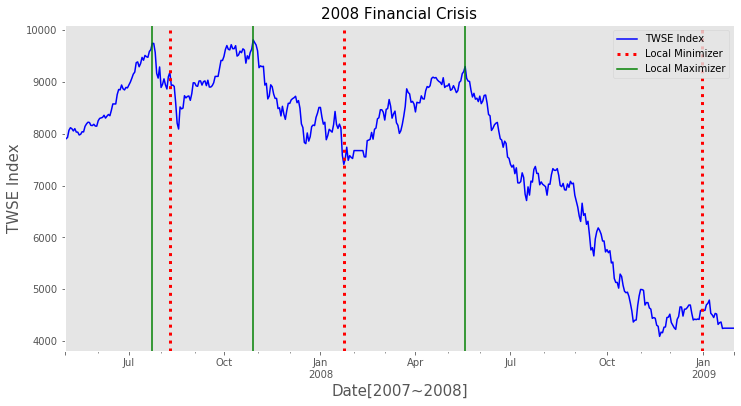

In [7]:
# plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,6))
df.loc["2007-05-01":"2009-01-31", "TWSE Index"].plot(color="blue")

plt.axvline(pd.Timestamp("2007-08-09"), color='r', linestyle=":", linewidth=3, label = "Local Minimizer")
plt.axvline(pd.Timestamp("2008-01-23"), color='r', linestyle=":", linewidth=3)
plt.axvline(pd.Timestamp("2008-12-31"), color='r', linestyle=":", linewidth=3)

plt.axvline(pd.Timestamp("2007-07-24"), color='green', label = "Local Maximizer")
plt.axvline(pd.Timestamp("2007-10-29"), color='green')
plt.axvline(pd.Timestamp("2008-05-19"), color='green')

plt.title("2008 Financial Crisis", fontsize=15)
plt.xlabel("Date[2007~2008]", fontsize=15)
plt.ylabel("TWSE Index", fontsize=15)
plt.legend(loc="upper right")
plt.grid()

plt.savefig("Financial_Crisis.png")

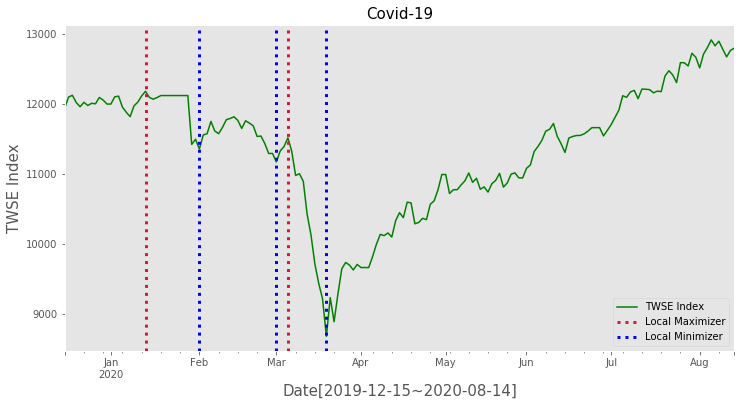

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
df.loc["2019-12-15":, "TWSE Index"].plot(color="green")

#"Local Maximizer"
plt.axvline(pd.Timestamp("2020-01-14"), color='crimson', linestyle=":", linewidth=3, label = "Local Maximizer")
plt.axvline(pd.Timestamp("2020-03-05"), color='crimson', linestyle=":", linewidth=3)

#"Local Minimizer"
plt.axvline(pd.Timestamp("2020-02-03"), color='b', linestyle=":", linewidth=3, label = "Local Minimizer")
plt.axvline(pd.Timestamp("2020-03-01"), color='b', linestyle=":", linewidth=3)
plt.axvline(pd.Timestamp("2020-03-19"), color='b', linestyle=":", linewidth=3)

plt.title("Covid-19", fontsize=15)
plt.xlabel(f"Date[2019-12-15~{df.index.date[-1]}]", fontsize=15)
plt.ylabel("TWSE Index", fontsize=15)
plt.legend(loc="lower right")
plt.grid()


plt.savefig("CV19.png")

### Since the TWSE Index remained the same as the previous non-holiday's, which is ubnormal
### We will drop the data on Chinese New Year and other short-term holidays

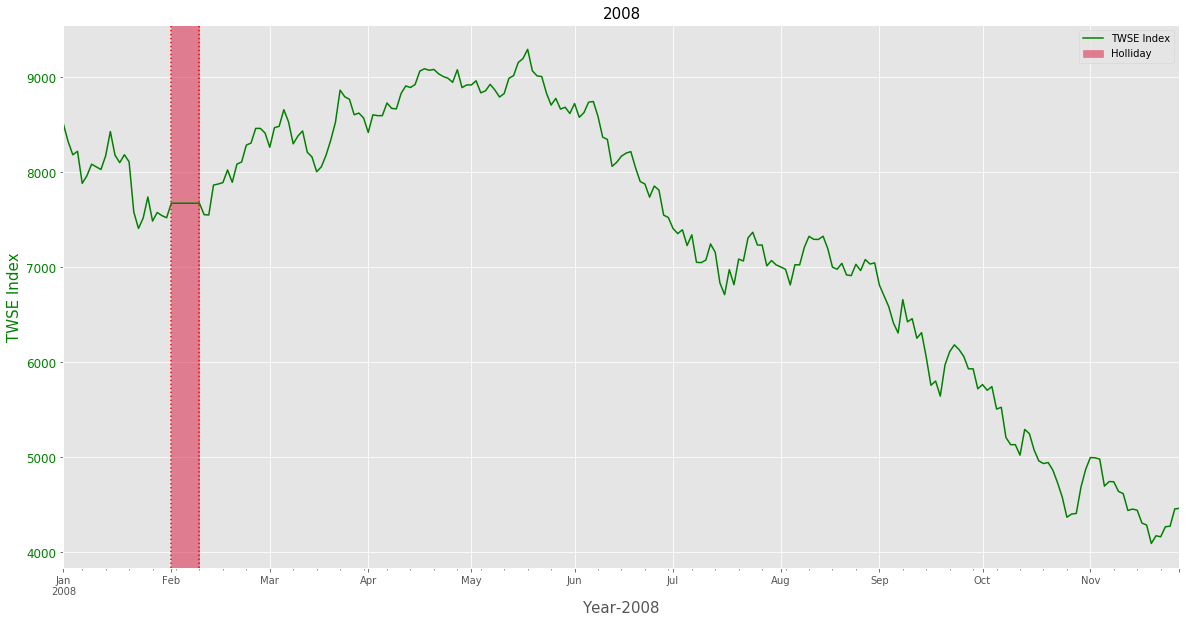

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
df.loc["2008-01":"2008-11", "TWSE Index"].plot(color="green")
plt.legend()

plt.axvline(pd.Timestamp("2008-02-01"), color='red', linestyle=":")
plt.axvline(pd.Timestamp("2008-02-11"), color='red', linestyle=":")

# fill color
ax.axvspan(pd.Timestamp("2008-02-01"), pd.Timestamp("2008-02-11"), alpha=0.5, color='crimson', label = "Holliday")
           
plt.title("2008", fontsize=15)
plt.xlabel("Year-2008", fontsize=15)
plt.ylabel("TWSE Index", fontsize=15, color="green")
ax.tick_params(axis='y', labelcolor="green", labelsize="large")
plt.legend(loc="upper right")

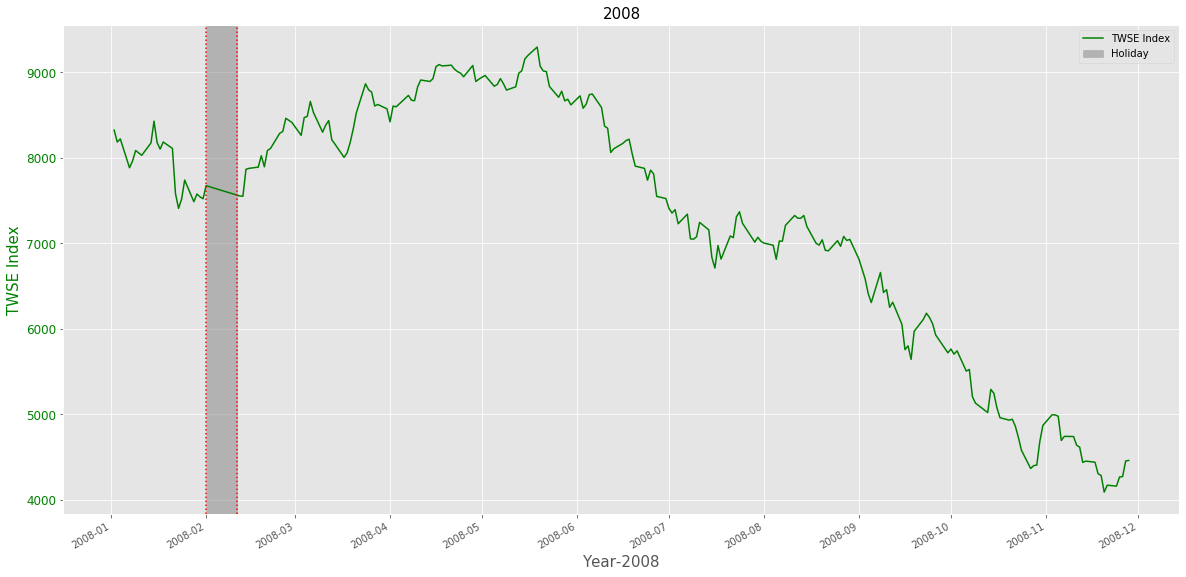

In [10]:
# drop the data in holidays
All_Holliday = df.loc[:, "TWSE Index"][df.loc[:, "TWSE Index"].duplicated()].index
df = df.drop(All_Holliday)

# plot again to show we drop out the holidays
fig, ax = plt.subplots(figsize=(20,10))
df.loc["2008-01":"2008-11", "TWSE Index"].plot(color="green")
plt.legend()

plt.axvline(pd.Timestamp("2008-02-01"), color='red', linestyle=":")
plt.axvline(pd.Timestamp("2008-02-11"), color='red', linestyle=":")

# fill color
ax.axvspan(pd.Timestamp("2008-02-01"), pd.Timestamp("2008-02-11"), alpha=0.5, color='grey', label = "Holiday")
           
plt.title("2008", fontsize=15)
plt.xlabel("Year-2008", fontsize=15)
plt.ylabel("TWSE Index", fontsize=15, color="green")
ax.tick_params(axis='y', labelcolor="green", labelsize="large")
plt.legend(loc="upper right")

### Create new features (add new columns): Year, Month, Day

In [11]:
# Create new features: Year, Month, Day, Hour
df["Year"] = [i.year for i in df.index]
df["Month"] = [i.month for i in df.index]
df["Day"] = [i.day for i in df.index]

### Take a look at the correlation of each pair in features

In [12]:
c = df.drop(["TWSE Index"], axis = 1).corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so[(so > 0.8) & (so != 1)]  # so[so == so.where(so != 1)] 

EMUSOAS Index    LF98OAS Index.1    0.800867
LF98OAS Index.1  EMUSOAS Index      0.800867
EMUSOAS Index    LF98OAS Index      0.800870
LF98OAS Index    EMUSOAS Index      0.800870
GRZEEUCU Index   EUR3EU27 Index     0.800905
                                      ...   
LF98OAS Index.1  LG30OAS Index      0.987485
BICLUSSP Index   .TED G Index       0.988319
.TED G Index     BICLUSSP Index     0.988319
LF98OAS Index    LF98OAS Index.1    1.000000
LF98OAS Index.1  LF98OAS Index      1.000000
Length: 212, dtype: float64

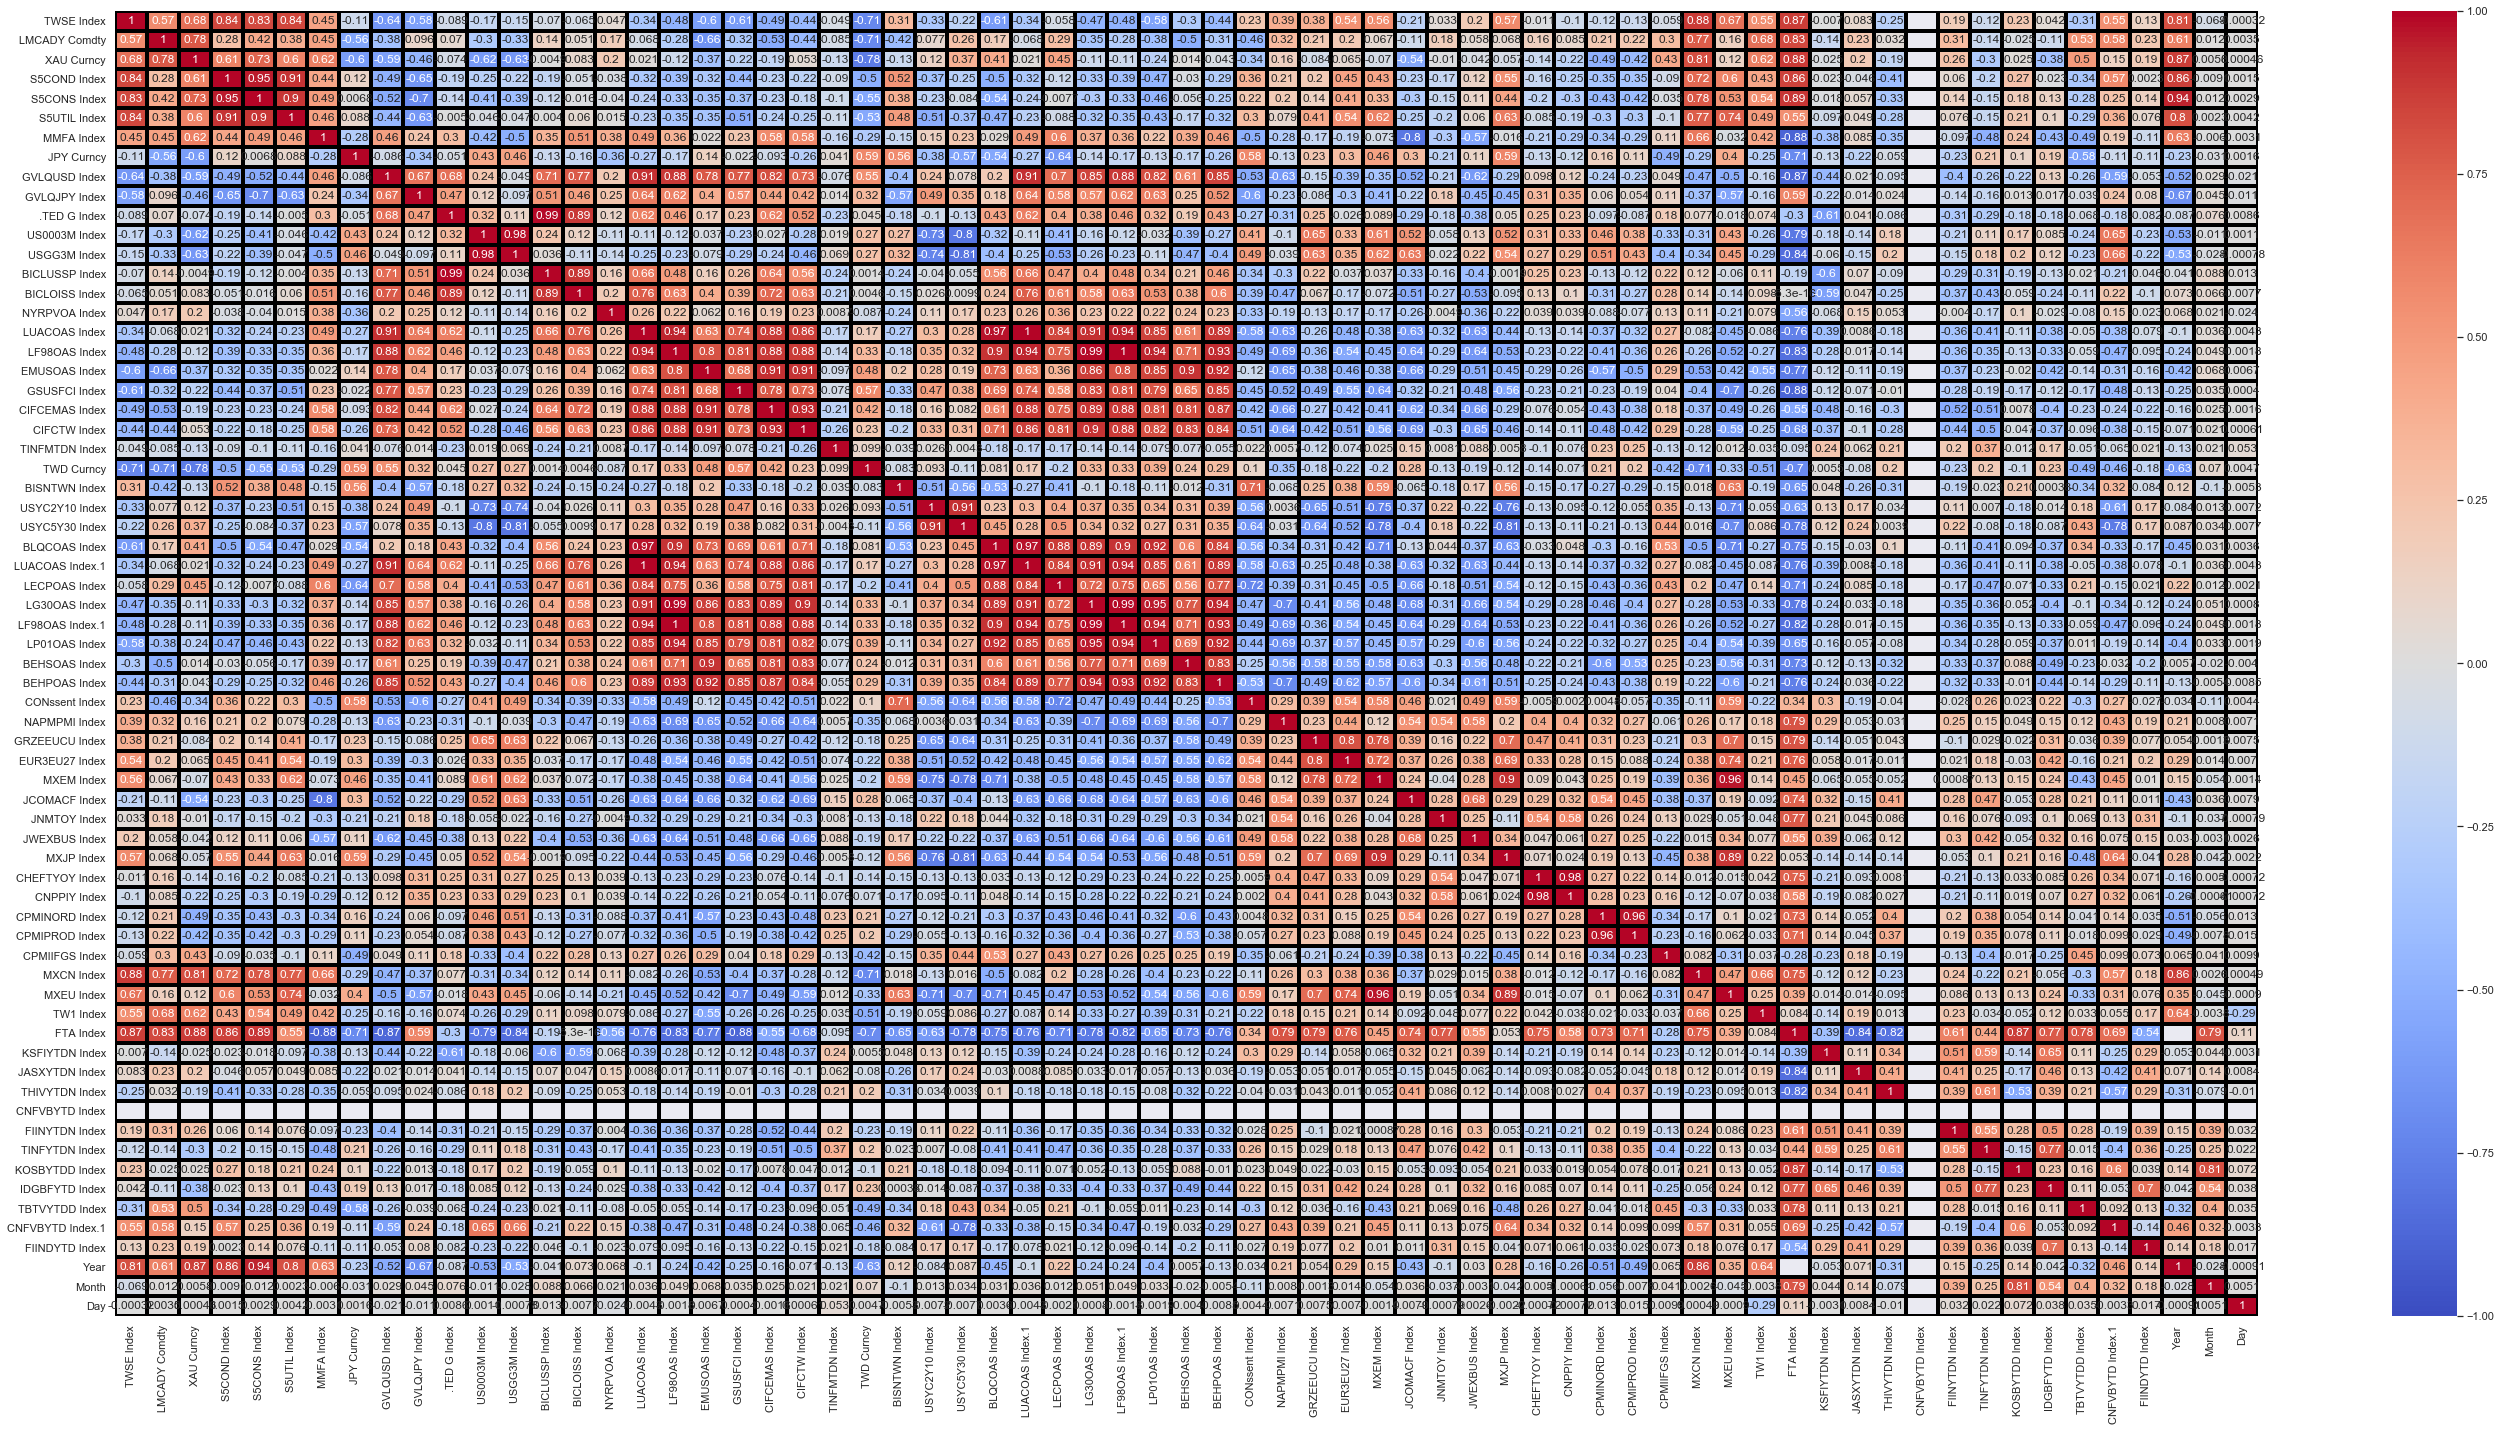

In [13]:
import seaborn as sns
sns.set(rc={'figure.figsize':(48, 24)})
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [14]:
### We can see that there are some columns are in high correlations, but we will still keep them both in this project

### Lastly in data preprocessing, we Split our data into Dependant Variable (Y) & Independent Variable (X)

In [15]:
y = df.loc[:, "TWSE Index"]
X = df.drop(["TWSE Index"], axis = 1)

---
## Task 1:  Sliding Window & Expanding Window Prediction
---

### Our metric in this task: Mean Absolute Percentage Error (MAPE)

In [16]:
def absolute_percentage_error(y, y_pred): 
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y)) * 100

### ◎ Sliding widow: predict 7 days later

In [17]:
class sliding:
    
    def __init__(self):
        return
        
    def fit(self, X, y, shift_days = 5 , prev_days = 30):
        self.shift_days = shift_days
        self.prev_days = prev_days
        new_y = y.loc[:,"TWSE Index"].shift(-shift_days)
        y_pred_list = []
        ape_list = []
        for i in range(prev_days, len(df)-shift_days):
            model.fit(X.iloc[i-prev_days:i], new_y.iloc[i-prev_days:i])
            y_pred = model.predict(X.iloc[i:i+1])
            y_pred_list.append(y_pred)
            ape_list.append(absolute_percentage_error(new_y.iloc[i:i+1], y_pred))

        ape_list = np.array(ape_list)
        mape = ape_list[~np.isnan(ape_list)].mean()
        
        self.y_pred = y_pred_list
        self.ape = ape_list
        self.mape = mape
        
        return 
    
    def plot_ape(self):
        plt.style.use('ggplot')
        fig, ax = plt.subplots(figsize=(20,10))
        ax.plot(self.ape, label = "APE", color = "green")
        plt.axhline(y = self.mape, color = "r", linestyle = "-", label = "MAPE")
        ax.legend()
        
        import matplotlib.transforms as transforms
        trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
        ax.text(0, self.mape, np.round(self.mape, 2), color="red", transform=trans, ha="right", va="center")


        plt.xlabel("Days")
        ax.tick_params(axis='y', labelcolor="green", labelsize="large")
        plt.ylabel("APE", color = 'green')
        plt.title(f"Sliding Window = {self.prev_days} ({self.shift_days} Days Prediction)")
        plt.grid()
        return
    
    
    def plot_ypred_ytrue(self):
        num = self.prev_days + self.shift_days
        y_true_list = df["TWSE Index"][num:]
        xs = list(range(len(y_true_list)))

        fig, ax = plt.subplots(figsize=(20,10))
        ax.plot(xs, y_true_list, label = "y_true", color = "b", linestyle = "-", linewidth = 1)
        ax.plot(xs, self.y_pred, label = "y_pred", color = "r", linestyle = ":", linewidth = 1)
        ax.legend()

        plt.xlabel("Days")
        plt.ylabel("TWSE", color = "blue")
        ax.tick_params(axis='y', labelcolor="blue", labelsize="large")
        plt.title("TWSE Index: Actual v.s. Prediction")
        plt.grid()
        return

In [18]:
from xgboost import XGBRegressor
model = XGBRegressor(silent=True)
y = df.loc[:, ["TWSE Index"]]
X = df.drop(["TWSE Index"], axis = 1)

In [19]:
window30_7d = sliding()
window30_7d.fit(X, y, 7, 30)

In [20]:
window50_7d = sliding()
window50_7d.fit(X, y, 7, 50)

In [21]:
window100_7d = sliding()
window100_7d.fit(X, y, 7, 100)

In [22]:
window150_7d = sliding()
window150_7d.fit(X, y, 7, 150)

In [23]:
window200_7d = sliding()
window200_7d.fit(X, y, 7, 200)

In [24]:
window250_7d = sliding()
window250_7d.fit(X, y, 7, 250)

In [25]:
window300_7d = sliding()
window300_7d.fit(X, y, 7, 300)

In [26]:
window400_7d = sliding()
window400_7d.fit(X, y, 7, 400)

In [27]:
window500_7d = sliding()
window500_7d.fit(X, y, 7, 500)

In [28]:
window600_7d = sliding()
window600_7d.fit(X, y, 7, 600)

In [29]:
window700_7d = sliding()
window700_7d.fit(X, y, 7, 700)

In [30]:
window800_7d = sliding()
window800_7d.fit(X, y, 7, 800)

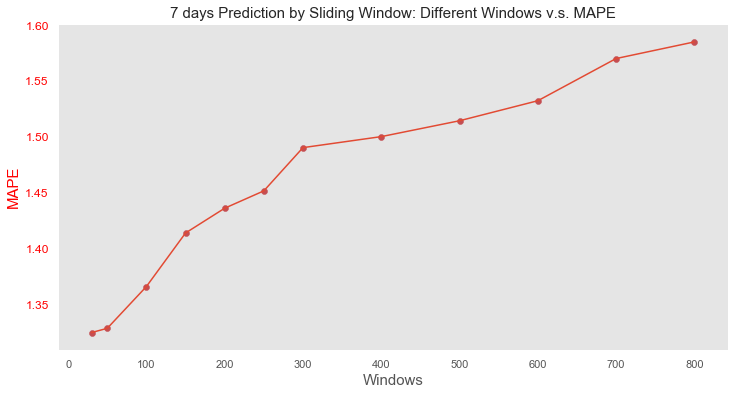

In [31]:
mape_list_temp = [window30_7d.mape, window50_7d.mape, window100_7d.mape, window150_7d.mape,
                  window200_7d.mape, window250_7d.mape, window300_7d.mape, window400_7d.mape,
                  window500_7d.mape, window600_7d.mape, window700_7d.mape, window800_7d.mape]

xs = [30, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800]

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(xs, mape_list_temp)
plt.scatter(xs, mape_list_temp, color="r")

plt.title("7 days Prediction by Sliding Window: Different Windows v.s. MAPE", fontsize=15)
plt.xlabel("Windows", fontsize=15)
plt.ylabel("MAPE", fontsize=15, color="red")
ax.tick_params(axis='y', labelcolor="red", labelsize="large")
#plt.legend(loc="lower right")
plt.grid()

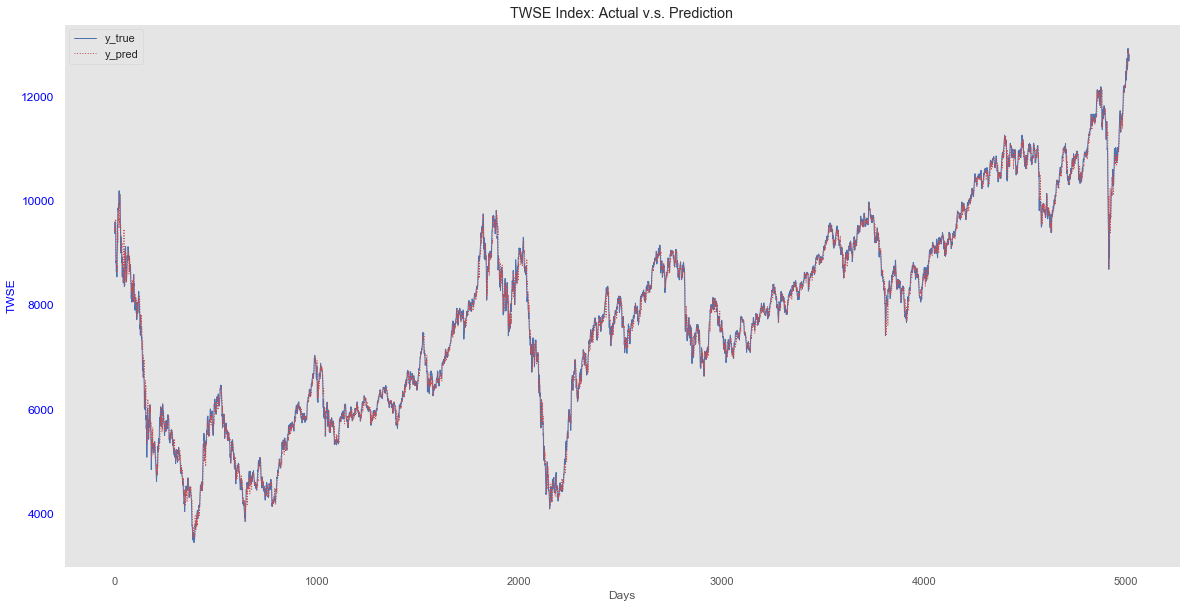

In [32]:
window30_7d.plot_ypred_ytrue()
plt.savefig("window30_7d_pred&true.png")

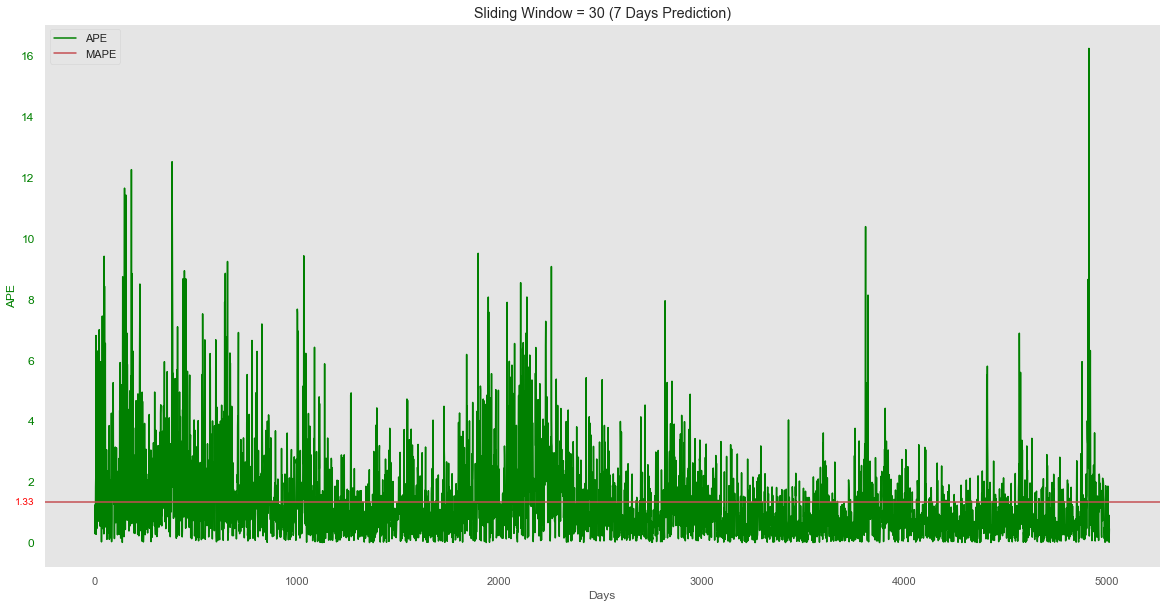

In [33]:
window30_7d.plot_ape()
plt.savefig("window30_7d_ape.png")

### ◎ Expanding widow: predict 7 days later

In [34]:
y = y.copy()
y["TWSE_7days"] = y["TWSE Index"].shift(-7)

In [35]:
model_ex5 = XGBRegressor(silent=True)
y_pred_list_ex5 = []
ape_list_ex5 = []

for i in range(250, len(X)-5):
    model_ex5.fit(X.iloc[:i], y["TWSE_7days"].iloc[:i])
    y_pred = model_ex5.predict(X.iloc[i:i+1])
    y_pred_list_ex5.append(y_pred)
    ape_list_ex5.append(absolute_percentage_error(y["TWSE_7days"].iloc[i:i+1], y_pred))

ape_list_ex5 = np.array(ape_list_ex5)
mape_ex5 = ape_list_ex5[~np.isnan(ape_list_ex5)].mean()   # 1.83095381406747
mape_ex5

2.4122642421013776

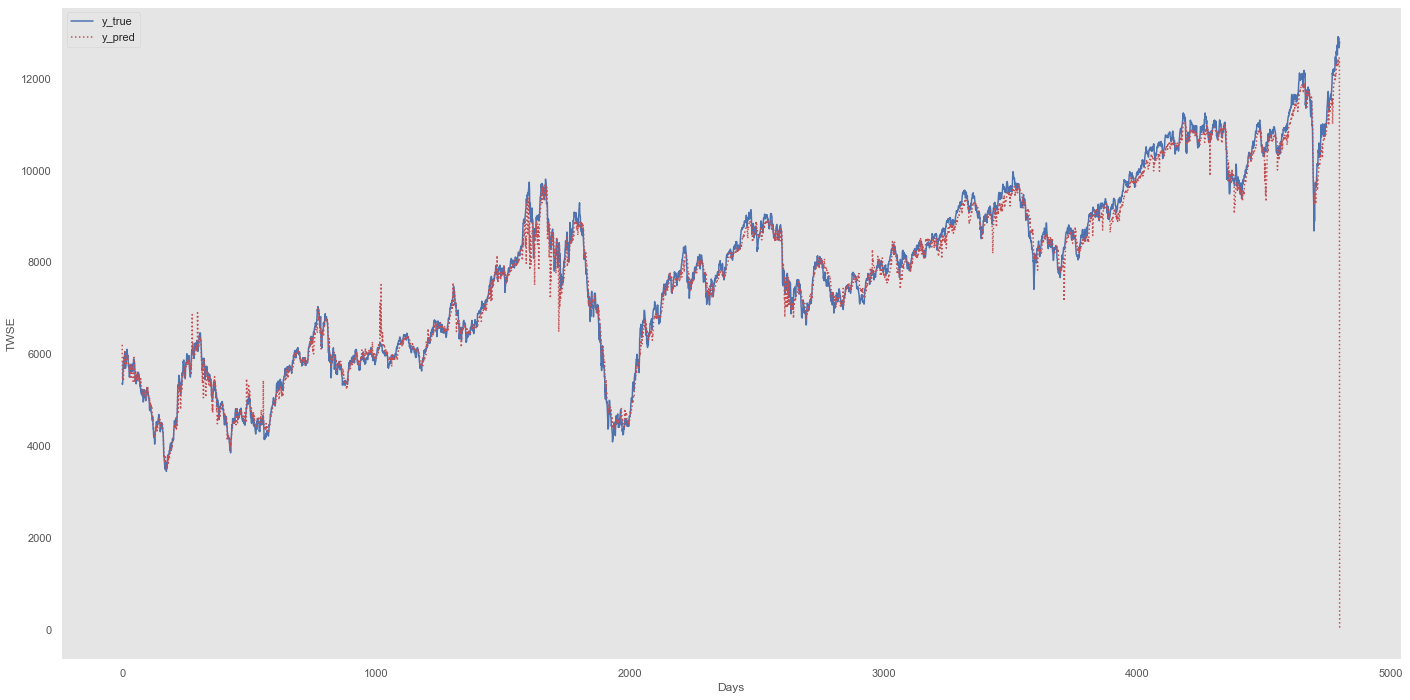

In [36]:
y_true_list = df["TWSE Index"][255:]
xs = list(range(len(y_pred_list_ex5)))

fig, ax = plt.subplots(figsize=(24,12))
ax.plot(xs, y_true_list, label = "y_true", color = "b", linestyle = "-", linewidth = 1.5)
ax.plot(xs, y_pred_list_ex5, label = "y_pred", color = "r", linestyle = ":", linewidth = 1.5)
ax.legend()

plt.xlabel("Days")
plt.ylabel("TWSE")
plt.grid()
plt.savefig("expand_pred&true.png")

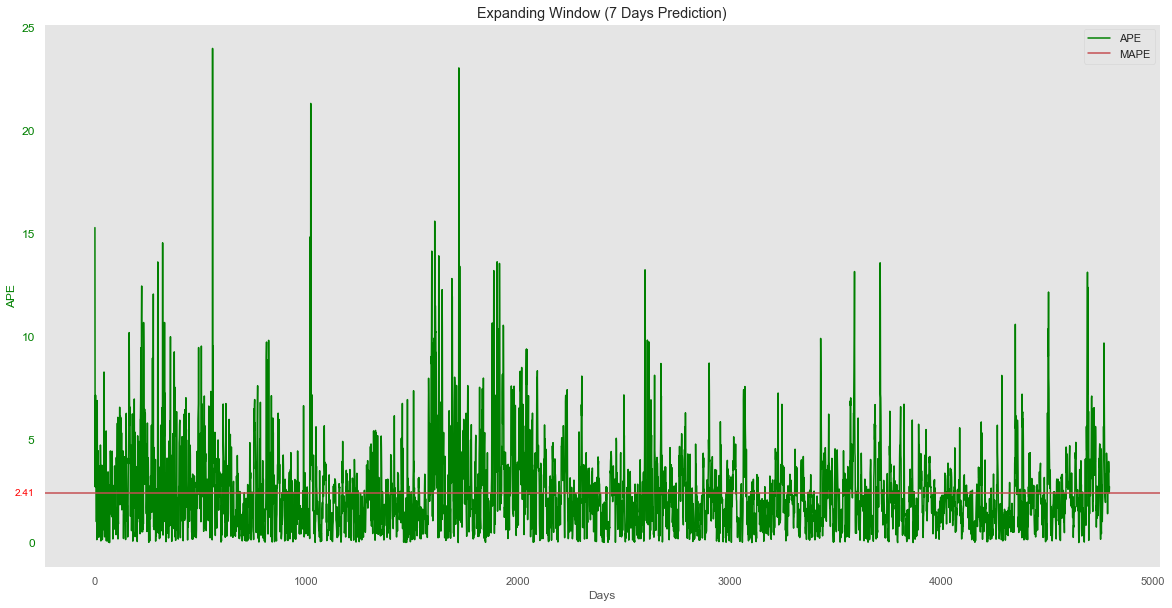

In [37]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(ape_list_ex5, label = "APE", color = "green")
plt.axhline(y = mape_ex5, color = "r", linestyle = "-", label = "MAPE")
ax.legend()

import matplotlib.transforms as transforms
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0, mape_ex5, np.round(mape_ex5, 2), color="red", transform=trans, ha="right", va="center")

plt.xlabel("Days")
plt.ylabel("APE")
ax.tick_params(axis='y', labelcolor="green", labelsize="large")
plt.ylabel("APE", color = 'green')
plt.title(f"Expanding Window (7 Days Prediction)")
plt.grid()
plt.savefig("expand_7d_ape.png")

---
## Task 2: Feature Importance
---

In [38]:
from collections import OrderedDict, defaultdict

class my_obj:
    
    def __init__(self):
        from collections import OrderedDict
        self.records = OrderedDict()
        
    def fit(self, model, X, y, start_from, end_to):
        day_range = X.loc[start_from:end_to].shape[0]
        self.start_from, self.end_to, self.day_range = start_from, end_to, day_range
        
        model.fit(X.loc[start_from:end_to], y.loc[start_from:end_to]) 
        
        importance = model.feature_importances_*100
        columns_name = f"Importace Values of {start_from} : {end_to} @ {day_range}"
        importanceDF = pd.DataFrame({columns_name:importance}, index = X.columns)
        importanceDF = importanceDF.sort_values(by = columns_name, axis = 0, ascending = False) 
        
        self.records[f"{start_from}:{end_to}@{day_range}"] = importanceDF
        
        return 
        
        
    def fit_with_day_range(self, model, X, y, end_to, day_range):
        start_from = df.loc[:end_to].tail(day_range).index[0]
        self.fit(model, X, y, start_from.date(), end_to)
        
        return
    
    
    def importance_DF_iloc(self, number = -1):
        importance_DF = list(self.records.values())[number]
        
        return importance_DF

    
    def importance_DF_loc(self, end_to, start_from = None, day_range = None):
        if start_from is None:
            start_from = df.loc[:end_to].tail(day_range).index[0].date()
        elif day_range is None:
            day_range = len(df.loc[start_from:end_to])

        importance_DF_loc = self.records[f"{start_from}:{end_to}@{day_range}"]
        
        return importance_DF_loc

    
    def feature_pool(self, number = -1, show_score = False):
        if show_score:
            tmp_dic = {key: zip(list(value.index), list(str(val[0]) for val in list(value.values)))
                       for key, value in self.records.items()}
            for key in tmp_dic:
                tmp_dic[key] = [':'.join(element) for element in tmp_dic[key]]
        else:
            tmp_dic = {key: list(value.index) for key, value in self.records.items()}
        fpDF = pd.DataFrame.from_dict(tmp_dic).head(number) #.style.set_caption("Selected_Feature_Pool")
        return fpDF
    
    
    def vote_DF(self, cnt = -1):
        df0 = self.feature_pool(number = cnt)
        
        ndf = df0.apply(pd.Series.value_counts).fillna(0)
        ndf['Total']= ndf.sum(axis=1)
        ndf = ndf.sort_values(by = "Total", ascending = False)

        return ndf
    
    
    def score_DF(self, cnt = -1, top = -1, hightlight = False):
        df = self.feature_pool(number = cnt)
        num = df.shape[0]
        
        transpose = df.T
        transpose.columns = list(reversed(range(1,num + 1)))
        transpose
        score = {feature: 0 for feature in np.unique(transpose).tolist()}
        
        for _, row in transpose.iterrows():
            for i, val in enumerate(row):
                  score[val] += num - i

        df_imp = pd.DataFrame()
        df_imp["Score_Keys"] = list(score.keys())
        df_imp["Score_Values"] = list(score.values())
        
        if hightlight:
              df_imp_sort = (df_imp.sort_values(by = "Score_Values", ascending = False).head(top).style
                                                .background_gradient(subset="Score_Values", cmap="Blues")
                                                .set_caption("Selected_Feature_Pool")
                            )
        else:
            df_imp_sort = df_imp.sort_values(by = "Score_Values", ascending = False)
        
        # return sorted(score.items(), key=lambda x: x[1], reverse=True)
        return df_imp_sort
    
    
    def average_gain_DF(self):
        score_dic = defaultdict(int)
        df_cnt = 0
        
        # weighted average
        for dict_keys, dict_values in self.records.items():
            df_cnt += int(dict_keys.split("@")[1])
            for key, score in dict_values.iterrows():
                score_dic[key] += score[0] * int(dict_keys.split("@")[1])

        df_imp = pd.DataFrame.from_dict(score_dic, orient='index')
        df_imp.rename(columns = {0: 'Average_Gain_Values(%)'}, inplace = True)
        df_imp.sort_values(by = "Average_Gain_Values(%)", ascending = False, inplace = True)     
        df_imp /= df_cnt
        
        return df_imp
    
    
    def cheat_sheet(self, hightlight = False):
        df1 = self.vote_DF(10).loc[:, ["Total"]].reset_index().head(10).rename(columns={'index': 'Vote_Keys','Total':'Vote_Values'})
        df2 = self.score_DF().head(10).reset_index(drop=True)
        df3 = self.average_gain_DF().head(10).reset_index().rename(columns = {'index': 'Average_Gain_Keys'})

        CheatSheet = pd.concat([df1, df2, df3], axis=1, sort=False)
        CheatSheet.index = np.arange(1,len(CheatSheet)+1)  # len(dataframe)原來也可以喔
        
        if hightlight:
            CheatSheet =  (CheatSheet.style
                             .bar('Average_Gain_Values(%)', align='zero', color="orange")
                             .highlight_max('Vote_Values', color="crimson")
                             .background_gradient(subset="Score_Values", cmap="bwr")
                             .highlight_min('Vote_Values', color="lightblue")
                          )
        else:
            CheatSheet
        
        
        return CheatSheet
    

    def plot(self, number = -1, end_to = None, start_from = None, day_range = None):
        
        if end_to is not None:
            if start_from is None:
                start_from = df.loc[:end_to].tail(day_range).index[0].date()
            elif day_range is None:
                day_range = len(df.loc[start_from:end_to])
        else:
            start_from = self.start_from
            end_to = self.end_to
            day_range = self.day_range
        
        key = f"{start_from}:{end_to}@{day_range}"
        tmp_df = self.records[key].sort_values(
            by = f"Importace Values of {start_from} : {end_to} @ {day_range}").tail(number)
        ax = tmp_df.plot(kind="barh", figsize = (12,6), color = "r")
        ax.legend(loc="lower right")
        for i, v in enumerate(tmp_df.values):
            ax.text(v + 0.5, i - 0.1, str(v), size = "15", color = 'blue', fontweight = 'bold')
        ax.set_xlabel(f"Importace Values of {start_from} : {end_to} @ {day_range}")
        ax.grid(True)
        
        return

In [39]:
y = df.loc[:, "TWSE Index"]
X = df.drop(["TWSE Index"], axis = 1)

### ◎ A.  Time Breakpoint 1: Move Up and Down

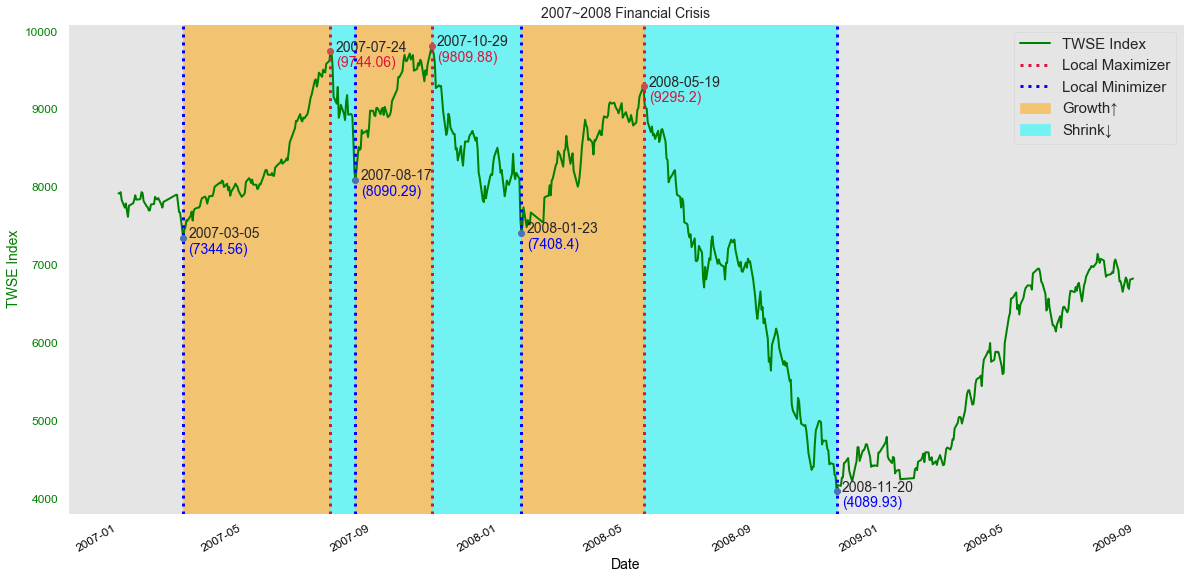

In [40]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,10))
df.loc["2007-01":"2009-08", "TWSE Index"].plot(color="green", linewidth=2)

#"Local Maximizer"
plt.axvline(pd.Timestamp("2007-07-24"), color='crimson', linewidth=3, label = "Local Maximizer", linestyle=":")
plt.axvline(pd.Timestamp("2007-10-29"), color='crimson', linestyle=":", linewidth=3)
plt.axvline(pd.Timestamp("2008-05-19"), color='crimson', linestyle=":", linewidth=3)

#"Local Minimizer"
plt.axvline(pd.Timestamp("2007-03-05"), color='blue', linestyle=":", linewidth=3, label = "Local Minimizer")
plt.axvline(pd.Timestamp("2007-08-17"), color='blue', linestyle=":", linewidth=3)
plt.axvline(pd.Timestamp("2008-01-23"), color='blue', linestyle=":", linewidth=3)
plt.axvline(pd.Timestamp("2008-11-20"), color='blue', linestyle=":", linewidth=3)

# text maximizer
ax.plot(dt.date(2007, 7, 24), y.loc["2007-07-24"], "ro")
ax.text(dt.date(2007, 7, 29), y.loc["2007-07-24"], "2007-07-24", fontsize=14)
ax.text(dt.date(2007, 7, 29), y.loc["2007-07-24"]-200, f"({y.loc['2007-07-24']})", color="crimson", fontsize=14)

ax.plot(dt.date(2007, 10, 29), y.loc["2007-10-29"], "ro")
ax.text(dt.date(2007, 11, 3), y.loc["2007-10-29"], "2007-10-29", fontsize=14)
ax.text(dt.date(2007, 11, 3), y.loc["2007-10-29"]-200, f"({y.loc['2007-10-29']})", color="crimson", fontsize=14)

ax.plot(dt.date(2008, 5, 19), y.loc["2008-05-19"], "ro")
ax.text(dt.date(2008, 5, 24), y.loc["2008-05-19"], s="2008-05-19", fontsize=14 )
ax.text(dt.date(2008, 5, 24), y.loc["2008-05-19"]-200, f"({y.loc['2008-05-19']})", color="crimson", fontsize=14)

# text minimizer
ax.plot(dt.date(2007, 3, 5), y.loc["2007-03-05"], "bo")
ax.text(dt.date(2007, 3, 10), y.loc["2007-03-05"], "2007-03-05", fontsize=14)
ax.text(dt.date(2007, 3, 10), y.loc["2007-03-05"]-200, f"({y.loc['2007-03-05']})", color="blue", fontsize=14)

ax.plot(dt.date(2007, 8, 17), y.loc["2007-08-17"], "bo")
ax.text(dt.date(2007, 8, 22), y.loc["2007-08-17"], "2007-08-17", fontsize=14)
ax.text(dt.date(2007, 8, 22), y.loc["2007-08-17"]-200, f"({y.loc['2007-08-17']})", color="blue", fontsize=14)

ax.plot(dt.date(2008, 1, 23), y.loc["2008-01-23"], "bo")
ax.text(dt.date(2008, 1, 28), y.loc["2008-01-23"], "2008-01-23", fontsize=14)
ax.text(dt.date(2008, 1, 28), y.loc["2008-01-23"]-200, f"({y.loc['2008-01-23']})", color="blue", fontsize=14)

ax.plot(dt.date(2008, 11, 20), y.loc["2008-11-20"], "bo")
ax.text(dt.date(2008, 11, 25), y.loc["2008-11-20"], "2008-11-20", fontsize=14)
ax.text(dt.date(2008, 11, 25), y.loc["2008-11-20"]-200, f"({y.loc['2008-11-20']})", color="blue", fontsize=14)

# fill color
ax.axvspan(dt.date(2007, 3, 5), dt.date(2007, 7, 24), alpha=0.5, color='orange', label = "Growth↑")
ax.axvspan(dt.date(2007, 8, 17), dt.date(2007, 10, 29), alpha=0.5, color='orange')
ax.axvspan(dt.date(2008, 1, 23), dt.date(2008, 5, 19), alpha=0.5, color='orange')

ax.axvspan(dt.date(2007, 7, 24), dt.date(2007, 8, 17), alpha=0.5, color='cyan', label = "Shrink↓")
ax.axvspan(dt.date(2007, 10, 29), dt.date(2008, 1, 23), alpha=0.5, color='cyan')
ax.axvspan(dt.date(2008, 5, 19), dt.date(2008, 11, 20), alpha=0.5, color='cyan')

# other setting
plt.title("2007~2008 Financial Crisis", fontsize=14)
plt.xlabel("Date", color='black', fontsize=14)
plt.ylabel("TWSE Index", color = 'green', fontsize=14)
ax.tick_params(axis='y', labelcolor="green", labelsize="large")
ax.tick_params(axis='x', labelcolor="black", labelsize="large")
plt.grid()
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 15}) # plt.legend(loc="upper right")

plt.savefig("Breakpoint1_FC_Growth_Shrink.png")

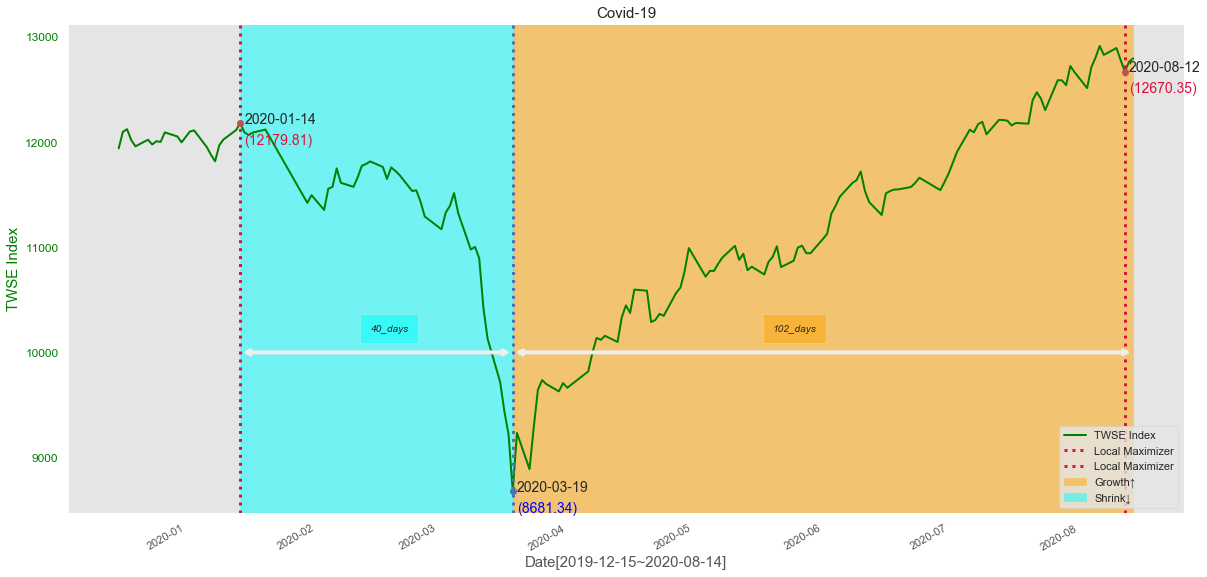

In [41]:
till_now = df.index[-1].date()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,10))
df.loc["2019-12-15":, "TWSE Index"].plot(color="green", linewidth=2)

#"Local Maximizer"
plt.axvline(pd.Timestamp("2020-01-14"), color='crimson', linestyle=":", linewidth=3, label = "Local Maximizer")
plt.axvline(pd.Timestamp("2020-08-12"), color='crimson', linestyle=":", linewidth=3, label = "Local Maximizer")

#"Local Minimizer"
plt.axvline(pd.Timestamp("2020-03-19"), color='b', linestyle=":", linewidth=3)
 
# text maximizer
ax.plot(dt.date(2020, 1, 14), y.loc["2020-01-14"], "ro")
ax.text(dt.date(2020, 1, 15), y.loc["2020-01-14"], "2020-01-14", fontsize=14)
ax.text(dt.date(2020, 1, 15), y.loc["2020-01-14"]-200, f"({y.loc['2020-01-14']})", c = "crimson", fontsize=14)

ax.plot(dt.date(2020, 8, 12), y.loc["2020-08-12"], "ro")
ax.text(dt.date(2020, 8, 13), y.loc["2020-08-12"], "2020-08-12", fontsize=14)
ax.text(dt.date(2020, 8, 13), y.loc["2020-08-12"]-200, f"({y.loc['2020-08-12']})", c = "crimson", fontsize=14)

# text minimizer
ax.plot(dt.date(2020, 3, 19), y.loc["2020-03-19"], "bo")
ax.text(dt.date(2020, 3, 20), y.loc["2020-03-19"], "2020-03-19", fontsize=14)
ax.text(dt.date(2020, 3, 20), y.loc["2020-03-19"]-200, f"({y.loc['2020-03-19']})", c = "blue", fontsize=14)

# fill color
ax.axvspan(dt.date(2020, 3, 19), till_now, alpha=0.5, color='orange', label = "Growth↑")
ax.axvspan(dt.date(2020, 1, 14), dt.date(2020, 3, 19), alpha=0.5, color='cyan', label = "Shrink↓")

# text
ax.text(dt.date(2020, 2, 14), 10200, '40_days', style='italic',bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 10})
plt.annotate(s='', xy=(dt.date(2020, 1, 14),10000), xytext=(dt.date(2020, 3, 19),10000),
             arrowprops=dict(facecolor='black', arrowstyle='<->', lw=4))


ax.text(dt.date(2020, 5, 20), 10200, f'{len(df.loc["2020-03-19":till_now])}_days', style='italic',bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 10})
plt.annotate(s='', xy=(dt.date(2020, 3, 19),10000), xytext=(till_now,10000),
             arrowprops=dict(facecolor='black', arrowstyle='<->', lw=4))

# other setting
plt.title("Covid-19", fontsize=15)
plt.xlabel(f"Date[2019-12-15~{df.index.date[-1]}]", fontsize=15)
plt.ylabel("TWSE Index", fontsize=15, color="green")
ax.tick_params(axis='y', labelcolor="green", labelsize="large")
plt.legend(loc="lower right")
plt.grid()

plt.savefig("Breakpoint1_CV19_Growth_Shrink.png")

### → Growth (Orange)：

In [42]:
FinancialCrisis08_Growth = my_obj()
model = XGBRegressor(silent = True)

FinancialCrisis08_Growth.fit(model, X, y, "2007-03-05", "2007-07-24")
FinancialCrisis08_Growth.fit(model, X, y, "2007-08-17", "2007-10-29")
FinancialCrisis08_Growth.fit(model, X, y, "2008-01-23", "2008-05-19")

In [43]:
Covid_Growth = my_obj()
model = XGBRegressor(silent = True)

Covid_Growth.fit(model, X, y, "2020-03-19", till_now)

### → Shrink (Blue)：

In [44]:
FinancialCrisis08_Shrink = my_obj()
model = XGBRegressor(silent = True)

FinancialCrisis08_Shrink.fit(model, X, y, "2007-07-24", "2007-08-17")
FinancialCrisis08_Shrink.fit(model, X, y, "2007-10-29", "2008-01-23")
FinancialCrisis08_Shrink.fit(model, X, y, "2008-05-19", "2008-11-20")

In [45]:
Covid_Shrink = my_obj()
model = XGBRegressor(silent = True)

Covid_Shrink.fit(model, X, y, "2020-01-14", "2020-03-19")

### ❇ Selected Feature Pool: Growth (Orange)

In [46]:
from IPython.display import display, HTML

In [47]:
res1 = FinancialCrisis08_Growth.cheat_sheet()
res2 = Covid_Growth.cheat_sheet() 

res1_fig = (res1.style
 .bar('Average_Gain_Values(%)', align='zero', color="orange")
 .highlight_max('Vote_Values', color="crimson")
 .background_gradient(subset="Score_Values", cmap="bwr")
 .highlight_min('Vote_Values', color="lightblue")
 .set_caption("2008 Financial Crisis_Growth↑：")
           )

res2_fig = (res2.style
 .bar('Average_Gain_Values(%)', align='zero', color="orange")
 .highlight_max('Vote_Values', color="pink")
 .background_gradient(subset="Score_Values", cmap="bwr")
 .highlight_min('Vote_Values', color="lightblue")
 .set_caption("Covid-19_Growth↑：")
)


print("Dataframe 1: 2008 Financial Crisis_Growth↑")
display(res1_fig)
print("-"*100)
print("Dataframe 2: 2020 Covid-19_Growth↑")
display(res2_fig)

Dataframe 1: 2008 Financial Crisis_Growth↑


,Vote_Keys,Vote_Values,Score_Keys,Score_Values,Average_Gain_Keys,Average_Gain_Values(%)
1,TINFYTDN Index,3.000000,S5CONS Index,187,S5CONS Index,14.753810
2,S5CONS Index,3.000000,TINFYTDN Index,177,MMFA Index,11.011843
3,THIVYTDN Index,2.000000,JASXYTDN Index,168,KSFIYTDN Index,9.704338
4,JASXYTDN Index,2.000000,MXCN Index,165,BICLOISS Index,9.465677
5,MXCN Index,2.000000,TINFMTDN Index,161,JPY Curncy,7.265935
6,BICLOISS Index,1.000000,THIVYTDN Index,159,TINFYTDN Index,7.081325
7,MMFA Index,1.000000,KSFIYTDN Index,159,GSUSFCI Index,6.006343
8,US0003M Index,1.000000,TWD Curncy,152,JASXYTDN Index,6.003495
9,TWD Curncy,1.000000,US0003M Index,151,CIFCEMAS Index,5.213715
10,TINFMTDN Index,1.000000,MXJP Index,146,THIVYTDN Index,5.181364


----------------------------------------------------------------------------------------------------
Dataframe 2: 2020 Covid-19_Growth↑


,Vote_Keys,Vote_Values,Score_Keys,Score_Values,Average_Gain_Keys,Average_Gain_Values(%)
1,GSUSFCI Index,1,EMUSOAS Index,65,EMUSOAS Index,28.264952
2,EMUSOAS Index,1,BEHPOAS Index,64,BEHPOAS Index,13.331813
3,S5COND Index,1,US0003M Index,63,US0003M Index,12.295759
4,MMFA Index,1,GSUSFCI Index,62,GSUSFCI Index,10.267947
5,LMCADY Comdty,1,.TED G Index,61,.TED G Index,8.015556
6,XAU Curncy,1,LMCADY Comdty,60,LMCADY Comdty,6.853789
7,.TED G Index,1,S5COND Index,59,S5COND Index,5.873691
8,MXJP Index,1,MMFA Index,58,MMFA Index,3.510867
9,BEHPOAS Index,1,XAU Curncy,57,XAU Curncy,2.082532
10,US0003M Index,1,MXJP Index,56,MXJP Index,1.834392


### ❇ Selected Feature Pool: Shrink (Blue)

In [48]:
res3 = FinancialCrisis08_Shrink.cheat_sheet()
res4 = Covid_Shrink.cheat_sheet()

res3_fig = (res3.style
 .bar('Average_Gain_Values(%)', align='zero', color="orange")
 .highlight_max('Vote_Values', color="crimson")
 .background_gradient(subset="Score_Values", cmap="bwr")
 .highlight_min('Vote_Values', color="lightblue")
 .set_caption("2008 Financial Crisis_Shrink↓：")
           )

res4_fig = (res4.style
 .bar('Average_Gain_Values(%)', align='zero', color="orange")
 .highlight_max('Vote_Values', color="pink")
 .background_gradient(subset="Score_Values", cmap="bwr")
 .highlight_min('Vote_Values', color="lightblue")
 .set_caption("Covid-19_Shrink↓：")
)


print("Dataframe 3: 2008 Financial Crisis_Shrink↓")
display(res3_fig)
print("-"*100)
print("Dataframe 4: 2020 Covid-19_Shrink↓")
display(res4_fig)

Dataframe 3: 2008 Financial Crisis_Shrink↓


,Vote_Keys,Vote_Values,Score_Keys,Score_Values,Average_Gain_Keys,Average_Gain_Values(%)
1,LUACOAS Index,3.000000,LUACOAS Index,180,BICLOISS Index,15.331652
2,FIINYTDN Index,2.000000,MXJP Index,173,MXJP Index,10.662459
3,GVLQUSD Index,2.000000,LMCADY Comdty,172,EMUSOAS Index,9.265116
4,MXJP Index,2.000000,MXEM Index,168,MXEM Index,7.536006
5,MXCN Index,2.000000,MXCN Index,167,LG30OAS Index,6.932173
6,LMCADY Comdty,2.000000,FIINYTDN Index,157,LUACOAS Index,6.805933
7,.TED G Index,1.000000,LF98OAS Index,154,TWD Curncy,6.435612
8,TWD Curncy,1.000000,THIVYTDN Index,148,LF98OAS Index,5.462548
9,TINFYTDN Index,1.000000,TINFYTDN Index,145,.TED G Index,5.303994
10,THIVYTDN Index,1.000000,BISNTWN Index,144,FIINYTDN Index,4.401780


----------------------------------------------------------------------------------------------------
Dataframe 4: 2020 Covid-19_Shrink↓


,Vote_Keys,Vote_Values,Score_Keys,Score_Values,Average_Gain_Keys,Average_Gain_Values(%)
1,EMUSOAS Index,1,S5COND Index,65,S5COND Index,31.861565
2,S5COND Index,1,LUACOAS Index,64,LUACOAS Index,21.687777
3,S5CONS Index,1,LG30OAS Index,63,LG30OAS Index,14.842732
4,LMCADY Comdty,1,S5CONS Index,62,S5CONS Index,7.319186
5,XAU Curncy,1,LMCADY Comdty,61,LMCADY Comdty,5.609879
6,BEHPOAS Index,1,MXCN Index,60,MXCN Index,5.152564
7,MXCN Index,1,EMUSOAS Index,59,EMUSOAS Index,5.032969
8,LUACOAS Index,1,MXJP Index,58,MXJP Index,2.434561
9,LG30OAS Index,1,XAU Curncy,57,XAU Curncy,1.968438
10,MXJP Index,1,BEHPOAS Index,56,BEHPOAS Index,1.588173


### ◎ B Time Breakpoint 2: Before and After the Breakout

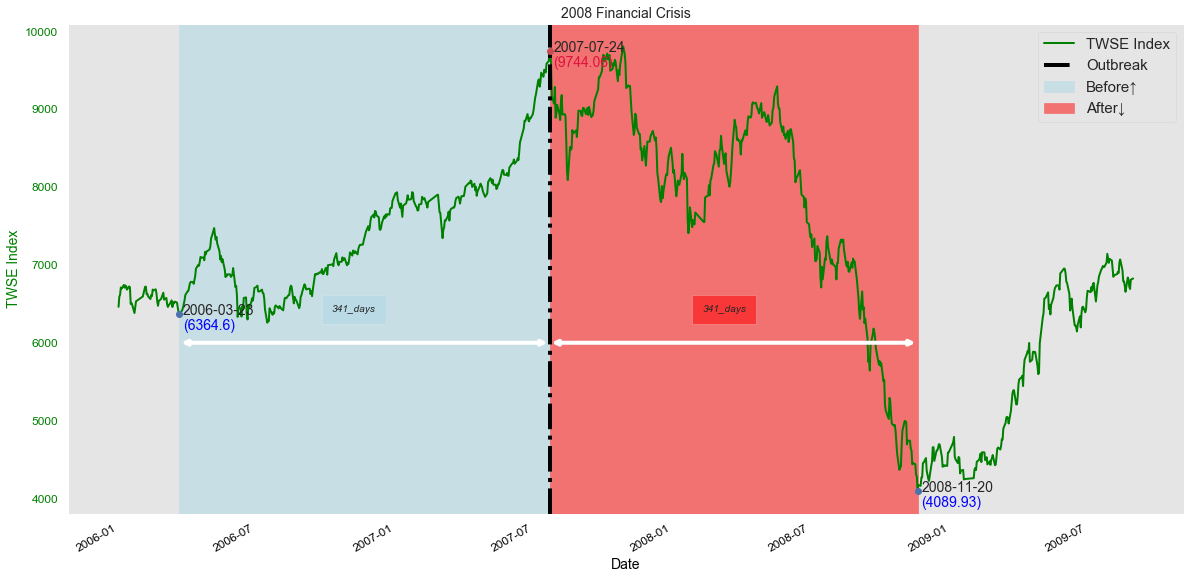

In [49]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,10))
df.loc["2006-01":"2009-08", "TWSE Index"].plot(color="green", linewidth=2)

#"Breakout Point"
plt.axvline(pd.Timestamp("2007-07-24"), color='black', linewidth=4, label = "Outbreak", linestyle="-.")

# text maximizer
ax.plot(dt.date(2007, 7, 24), y.loc["2007-07-24"], "ro")
ax.text(dt.date(2007, 7, 29), y.loc["2007-07-24"], "2007-07-24", fontsize=14)
ax.text(dt.date(2007, 7, 29), y.loc["2007-07-24"]-200, f"({y.loc['2007-07-24']})", color="crimson", fontsize=14)

# text minimizer
ax.plot(dt.date(2008, 11, 20), y.loc["2008-11-20"], "bo")
ax.text(dt.date(2008, 11, 25), y.loc["2008-11-20"], "2008-11-20", fontsize=14)
ax.text(dt.date(2008, 11, 25), y.loc["2008-11-20"]-200, f"({y.loc['2008-11-20']})", color="blue", fontsize=14)

ax.plot(dt.date(2006, 3, 23), y.loc["2006-03-23"], "bo")
ax.text(dt.date(2006, 3, 28), y.loc["2006-03-23"], "2006-03-23", fontsize=14)
ax.text(dt.date(2006, 3, 28), y.loc["2006-03-23"]-200, f"({y.loc['2006-03-23']})", color="blue", fontsize=14)


# fill color
#plt.fill(df.loc["2007-01":"2009-08", "TWSE Index"].index, df.loc["2007-01":"2009-08", "TWSE Index"], color = "g", alpha = 0.3)
ax.axvspan(dt.date(2006, 3, 23), dt.date(2007, 7, 24), alpha=0.5, color='lightblue', label = "Before↑")
ax.axvspan(dt.date(2007, 7, 24), dt.date(2008, 11, 20), alpha=0.5, color='red', label = "After↓")

# text
ax.text(dt.date(2006, 10, 10), 6400, '341_days', style='italic',bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})
plt.annotate(s='', xy=(dt.date(2006, 3, 23), 6000), xytext=(dt.date(2007, 7, 24), 6000),
             arrowprops=dict(color='white', arrowstyle='<->', lw=4))

ax.text(dt.date(2008, 2, 10), 6400, '341_days', style='italic',bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.annotate(s='', xy=(dt.date(2007, 7, 24), 6000), xytext=(dt.date(2008, 11, 20), 6000),
             arrowprops=dict(color='white', arrowstyle='<->', lw=4))

# other setting
plt.title("2008 Financial Crisis", fontsize=14)
plt.xlabel("Date", color='black', fontsize=14)
plt.ylabel("TWSE Index", color = 'green', fontsize=14)
ax.tick_params(axis='y', labelcolor="green", labelsize="large")
ax.tick_params(axis='x', labelcolor="black", labelsize="large")
plt.grid()
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 15})

plt.savefig("2008FC_BA.png")

### → Before the Breakout Point of 2008 Financial Crisis: (Light Blue)

In [50]:
FinancialCrisis08_Outbreak_Before = my_obj()
model = XGBRegressor(silent = True)

FinancialCrisis08_Outbreak_Before.fit_with_day_range(model, X, y, end_to = "2007-07-24", day_range = 341)

### → After the Breakout Point of 2008 Financial Crisis: (Red)

In [51]:
start = "2007-07-24"
end = "2008-11-20"

FinancialCrisis08_Outbreak_After = my_obj()
model = XGBRegressor(silent = True)

FinancialCrisis08_Outbreak_After.fit(model, X, y, start_from = start, end_to = end)

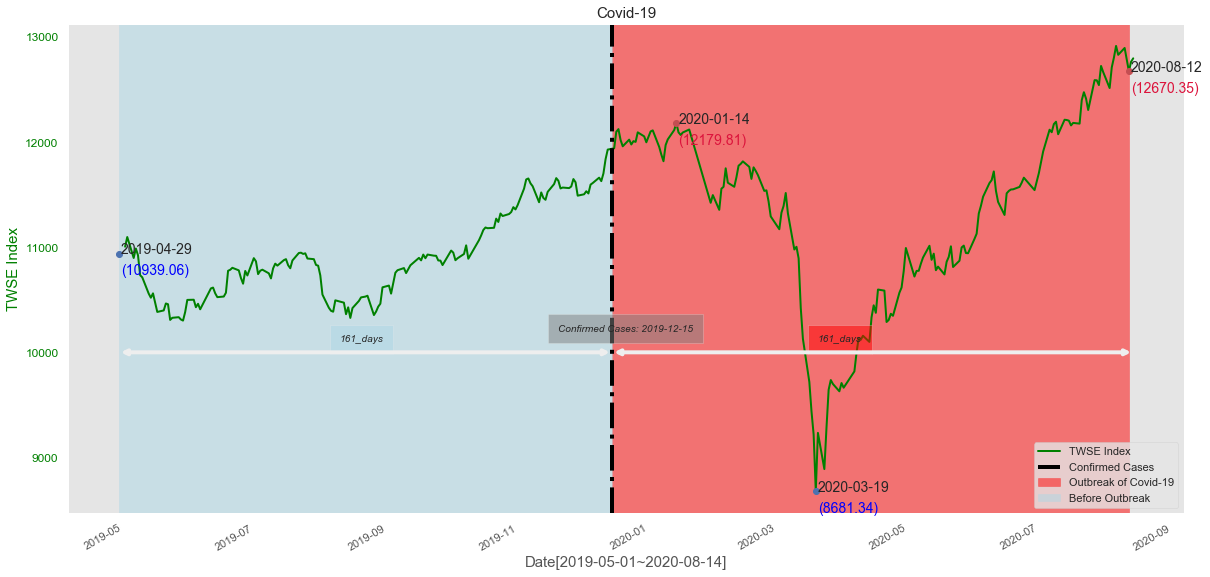

In [52]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,10))
df.loc["2019-05-01":, "TWSE Index"].plot(color="green", linewidth=2)

#"Breakout Point"
plt.axvline(pd.Timestamp("2019-12-15"), color='black', linewidth=4, label = "Confirmed Cases", linestyle="-.")

# text maximizer
ax.plot(dt.date(2020, 1, 14), y.loc["2020-01-14"], "ro")
ax.text(dt.date(2020, 1, 15), y.loc["2020-01-14"], "2020-01-14", fontsize=14)
ax.text(dt.date(2020, 1, 15), y.loc["2020-01-14"]-200, f"({y.loc['2020-01-14']})", c = "crimson", fontsize=14)

ax.plot(dt.date(2020, 8, 12), y.loc["2020-08-12"], "ro")
ax.text(dt.date(2020, 8, 13), y.loc["2020-08-12"], "2020-08-12", fontsize=14)
ax.text(dt.date(2020, 8, 13), y.loc["2020-08-12"]-200, f"({y.loc['2020-08-12']})", c = "crimson", fontsize=14)

# text minimizer
ax.plot(dt.date(2020, 3, 19), y.loc["2020-03-19"], "bo")
ax.text(dt.date(2020, 3, 20), y.loc["2020-03-19"], "2020-03-19", fontsize=14)
ax.text(dt.date(2020, 3, 20), y.loc["2020-03-19"]-200, f"({y.loc['2020-03-19']})", c = "blue", fontsize=14)

ax.plot(dt.date(2019, 4, 29), y.loc["2019-04-29"], "bo")
ax.text(dt.date(2019, 4, 30), y.loc["2019-04-29"], "2019-04-29", fontsize=14)
ax.text(dt.date(2019, 4, 30), y.loc["2019-04-29"]-200, f"({y.loc['2019-04-29']})", c = "blue", fontsize=14)

# fill color
ax.axvspan(dt.date(2019, 12, 15), dt.date(2020, 8, 12), alpha=0.5, color='red', label = "Outbreak of Covid-19")
ax.axvspan(dt.date(2019, 4, 29), dt.date(2019, 12, 15), alpha=0.5, color='lightblue', label = "Before Outbreak")

# text
ax.text(dt.date(2019, 11, 20), 10200, "Confirmed Cases: 2019-12-15", style='italic',bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})

ax.text(dt.date(2019, 8, 10), 10100, f'{len(df.loc["2019-12-15":till_now])}_days', style='italic',bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})
plt.annotate(s='', xy=(dt.date(2019, 4, 29), 10000), xytext=(dt.date(2019, 12, 15), 10000),
             arrowprops=dict(facecolor='black', arrowstyle='<->', lw=4))

ax.text(dt.date(2020, 3, 20), 10100, f'{len(df.loc["2019-12-15":till_now])}_days', style='italic',bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.annotate(s='', xy=(dt.date(2019, 12, 15), 10000), xytext=(till_now, 10000),
             arrowprops=dict(facecolor='black', arrowstyle='<->', lw=4))

# other setting
plt.title("Covid-19", fontsize=15)
plt.xlabel(f"Date[2019-05-01~{df.index.date[-1]}]", fontsize=15)
plt.ylabel("TWSE Index", fontsize=15, color="green")
ax.tick_params(axis='y', labelcolor="green", labelsize="large")
plt.legend(loc="lower right")
plt.grid()

plt.savefig("CV19_BA.png")

### → Before the Breakout Point of 2008 Financial Crisis: (Light Blue)

In [53]:
Covid_Outbreak_Before = my_obj()
model = XGBRegressor(silent = True)
Covid_Outbreak_Before.fit(model, X, y, start_from = "2019-04-29", end_to = "2019-12-15")

### → After the Breakout Point of 2008 Financial Crisis: (Red)

In [54]:
start = "2019-12-15"
end = till_now
Covid_Outbreak_After = my_obj()
model = XGBRegressor(silent = True)
Covid_Outbreak_After.fit(model, X, y, start_from = start, end_to = end)

### ❇ Selected Feature Pool: Before the Outbreak (Light Blue)

In [55]:
res5 = FinancialCrisis08_Outbreak_Before.cheat_sheet()
res6 = Covid_Outbreak_Before.cheat_sheet() 

res5_fig = (res5.style
 .bar('Average_Gain_Values(%)', align='zero', color="orange")
 .highlight_max('Vote_Values', color="crimson")
 .background_gradient(subset="Score_Values", cmap="bwr")
 .highlight_min('Vote_Values', color="lightblue")
 .set_caption("2008 Financial Crisis_Before the Outbreak ：")
           )

res6_fig = (res6.style
 .bar('Average_Gain_Values(%)', align='zero', color="orange")
 .highlight_max('Vote_Values', color="pink")
 .background_gradient(subset="Score_Values", cmap="bwr")
 .highlight_min('Vote_Values', color="lightblue")
 .set_caption("Covid-19_Before the Outbreak ")
)


print("Dataframe 5: 2008 Financial Crisis_Before the Outbreak")
display(res5_fig)
print("-"*100)
print("Dataframe 6: 2020 Covid-19_Before the Outbreak")
display(res6_fig)

Dataframe 5: 2008 Financial Crisis_Before the Outbreak


,Vote_Keys,Vote_Values,Score_Keys,Score_Values,Average_Gain_Keys,Average_Gain_Values(%)
1,MMFA Index,1,MMFA Index,65,MMFA Index,33.375431
2,GRZEEUCU Index,1,MXEU Index,64,MXEU Index,20.513411
3,MXEM Index,1,GRZEEUCU Index,63,GRZEEUCU Index,20.505035
4,CNPPIY Index,1,CNPPIY Index,62,CNPPIY Index,7.909738
5,LF98OAS Index,1,MXCN Index,61,MXCN Index,7.005063
6,MXCN Index,1,CONssent Index,60,CONssent Index,4.525065
7,MXEU Index,1,MXEM Index,59,MXEM Index,1.388348
8,LUACOAS Index,1,LUACOAS Index,58,LUACOAS Index,1.130296
9,CONssent Index,1,CPMIPROD Index,57,CPMIPROD Index,0.761054
10,CPMIPROD Index,1,LF98OAS Index,56,LF98OAS Index,0.707323


----------------------------------------------------------------------------------------------------
Dataframe 6: 2020 Covid-19_Before the Outbreak


,Vote_Keys,Vote_Values,Score_Keys,Score_Values,Average_Gain_Keys,Average_Gain_Values(%)
1,MXJP Index,1,KOSBYTDD Index,65,KOSBYTDD Index,26.012320
2,TWD Curncy,1,MXEU Index,64,MXEU Index,15.201584
3,BISNTWN Index,1,USGG3M Index,63,USGG3M Index,13.942024
4,MXEM Index,1,MXEM Index,62,MXEM Index,13.281888
5,KOSBYTDD Index,1,BISNTWN Index,61,BISNTWN Index,10.285386
6,TINFYTDN Index,1,MXJP Index,60,MXJP Index,5.282289
7,BLQCOAS Index,1,TINFYTDN Index,59,TINFYTDN Index,4.810389
8,MXEU Index,1,TWD Curncy,58,TWD Curncy,4.671617
9,TINFMTDN Index,1,BLQCOAS Index,57,BLQCOAS Index,2.255073
10,USGG3M Index,1,TINFMTDN Index,56,TINFMTDN Index,0.954278


### ❇ Selected Feature Pool: After the Outbreak (Red)

In [56]:
res7 = FinancialCrisis08_Outbreak_After.cheat_sheet()
res8 = Covid_Outbreak_After.cheat_sheet() 

res7_fig = (res7.style
 .bar('Average_Gain_Values(%)', align='zero', color="orange")
 .highlight_max('Vote_Values', color="crimson")
 .background_gradient(subset="Score_Values", cmap="bwr")
 .highlight_min('Vote_Values', color="lightblue")
 .set_caption("2008 Financial Crisis_After the Outbreak ：")
           )

res8_fig = (res8.style
 .bar('Average_Gain_Values(%)', align='zero', color="orange")
 .highlight_max('Vote_Values', color="pink")
 .background_gradient(subset="Score_Values", cmap="bwr")
 .highlight_min('Vote_Values', color="lightblue")
 .set_caption("Covid-19_After the Outbreak ")
)


print("Dataframe 7: 2008 Financial Crisis_After the Outbreak")
display(res7_fig)
print("-"*100)
print("Dataframe 8: 2020 Covid-19_After the Outbreak")
display(res8_fig)

Dataframe 7: 2008 Financial Crisis_After the Outbreak


,Vote_Keys,Vote_Values,Score_Keys,Score_Values,Average_Gain_Keys,Average_Gain_Values(%)
1,JNMTOY Index,1,LUACOAS Index,65,LUACOAS Index,55.152149
2,CPMINORD Index,1,LECPOAS Index,64,LECPOAS Index,17.867908
3,LECPOAS Index,1,THIVYTDN Index,63,THIVYTDN Index,6.825109
4,TINFYTDN Index,1,TINFYTDN Index,62,TINFYTDN Index,4.052535
5,LUACOAS Index,1,FIINYTDN Index,61,FIINYTDN Index,3.421062
6,KSFIYTDN Index,1,CPMINORD Index,60,CPMINORD Index,3.218426
7,LG30OAS Index,1,LG30OAS Index,59,LG30OAS Index,2.172735
8,THIVYTDN Index,1,JNMTOY Index,58,JNMTOY Index,1.301481
9,MXEM Index,1,KSFIYTDN Index,57,KSFIYTDN Index,1.253768
10,FIINYTDN Index,1,MXEM Index,56,MXEM Index,0.975034


----------------------------------------------------------------------------------------------------
Dataframe 8: 2020 Covid-19_After the Outbreak


,Vote_Keys,Vote_Values,Score_Keys,Score_Values,Average_Gain_Keys,Average_Gain_Values(%)
1,MXCN Index,1,BLQCOAS Index,65,BLQCOAS Index,20.846001
2,BICLUSSP Index,1,BEHSOAS Index,64,BEHSOAS Index,20.702892
3,LMCADY Comdty,1,LG30OAS Index,63,LG30OAS Index,19.860994
4,XAU Curncy,1,BICLUSSP Index,62,BICLUSSP Index,10.549088
5,BLQCOAS Index,1,LUACOAS Index,61,LUACOAS Index,10.340322
6,LUACOAS Index,1,LP01OAS Index,60,LP01OAS Index,3.914926
7,LP01OAS Index,1,LMCADY Comdty,59,LMCADY Comdty,3.778980
8,BEHSOAS Index,1,GSUSFCI Index,58,GSUSFCI Index,2.861295
9,GSUSFCI Index,1,MXCN Index,57,MXCN Index,2.000213
10,LG30OAS Index,1,XAU Curncy,56,XAU Curncy,1.309353
